In [90]:
import re
import os
import pandas as pd
import numpy as np

In [91]:
os.chdir('../audio_data')

In [92]:
audio_csv_names = [filename for filename in os.listdir() if 'audio' in filename]

In [93]:
len(audio_csv_names)

761

In [94]:
audio_dataframes = [
    pd.read_csv(csv_path) for csv_path in audio_csv_names
]

In [95]:
final_audio_df = pd.concat(audio_dataframes)

In [96]:
final_audio_df = final_audio_df.drop(columns=['Unnamed: 0'])

In [97]:
final_audio_df['artist'].value_counts()[:5]

MORGENSHTERN           385
Макс Корж              179
Miyagi & Andy Panda    166
10AGE                  164
HammAli & Navai        162
Name: artist, dtype: int64

In [98]:
final_audio_df.shape

(30169, 5)

In [99]:
final_audio_df['artist'].value_counts()[:10]

MORGENSHTERN           385
Макс Корж              179
Miyagi & Andy Panda    166
10AGE                  164
HammAli & Navai        162
Ramil'                 157
Скриптонит             135
Король и Шут           120
УННВ                   117
Элджей                 110
Name: artist, dtype: int64

## There are many rows where track has not one artist. We need to separate it on two several columns: main_artist and feat_artist

In [100]:
def separate_artists(artist: str):
    artists = re.split(', | feat. ', artist, maxsplit=1)
    if len(artists) == 1:  # There is only a main artist
        return pd.Series({'main_artist': artists[0], 'feat_artist': 'absence'})
    return pd.Series({'main_artist': artists[0], 'feat_artist': artists[1]})

In [101]:
final_audio_df[['main_artist', 'feat_artist']] = final_audio_df['artist'].apply(separate_artists)

In [102]:
final_audio_df[['artist', 'title']].value_counts()

artist                 title                  
BRANYA, MACAN          Пополам                    95
10AGE                  Пушка                      84
Джарахов, Markul       Я в моменте                73
HammAli & Navai        Птичка                     67
Mekhman                Копия пиратская            64
                                                  ..
Meek Mill feat. Drake  Going Bad (feat. Drake)     1
Meek Mill              Gave Em Hope                1
Medina✿                Детство                     1
                       Глупый Молодой              1
🧸.Krasnoyarskye.🧸      🧸ᴀɴᴅʀᴏᴍᴇᴅᴀ🧸                 1
Length: 20801, dtype: int64

In [103]:
separated_final_audio_df = final_audio_df.drop(columns='artist')

In [104]:
separated_final_audio_df[['main_artist', 'title']].value_counts()[:10]

main_artist        title          
BRANYA             Пополам            95
10AGE              Пушка              84
Джарахов           Я в моменте        74
HammAli & Navai    Птичка             67
Mekhman            Копия пиратская    64
Minelli            Rampampam          58
GAYAZOV$ BROTHER$  Пошла жара         56
SLAVA MARLOW       CAMRY 3.5          48
10AGE              Нету интереса      47
Ramil'             Сон                45
dtype: int64

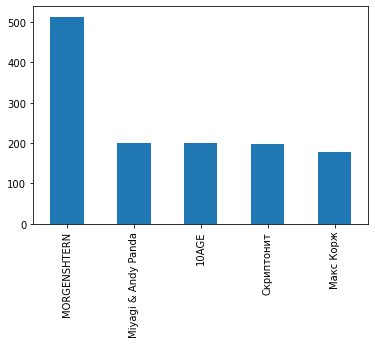

In [105]:
_ = separated_final_audio_df['main_artist'].value_counts()[:5].plot.bar()

## GROUP ANALYSIS

In [81]:
os.chdir('../group_data')

In [82]:
group_file_paths = [filename for filename in os.listdir() if 'group' in filename]

In [83]:
len(group_file_paths)

1709

In [71]:
final_group_df = pd.concat([pd.read_csv(filename) for filename in group_file_paths])

In [72]:
final_group_df = final_group_df.drop(columns='Unnamed: 0')

In [73]:
final_group_df.head(10)

,id,name,screen_name,is_closed,type,members_count,activity,age_limits,city,is_admin,is_member,is_advertiser,photo_50,photo_100,photo_200
0,57846937,MDK,mudakoff,0,page,11669902.0,Юмор,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55662720,Психология,psyxov,0,page,6115888.0,Общество,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46466345,"С нами стыдно, зато весело!",contact_fun,0,page,4464702.0,Юмор,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46509740,Маникюр | Дизайн ногтей,modnailru,0,page,4251328.0,Уход за собой,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62122883,Хитрости жизни,piece.of_cake,0,page,3312741.0,Творчество,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,42968101,Читающие,club42968101,0,page,2370107.0,Литература,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,57846937,MDK,mudakoff,0,page,11669902.0,Юмор,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,171319277,Знакомства Ростов-на-Дону,rostovcityloveplace,0,group,3621.0,Открытая группа,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,178612435,Трансы Ростова-на-Дону,club178612435,0,group,217.0,Открытая группа,1.0,"{'id': 119, 'title': 'Ростов-на-Дону'}",NaN,NaN,NaN,NaN,NaN,NaN
0,57846937,MDK,mudakoff,0,page,11669902.0,Юмор,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
